In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn import tree
from sklearn import metrics

In [2]:
store_data = pd.read_csv("storedata.csv")

In [3]:
store_data.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [4]:
store_data.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [5]:
store_data = store_data.drop(['Town', 'Country','Store ID','Manager name'], axis = 1)

In [64]:
store_data.head(20)

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1
1,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1
2,0,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,2
3,7,17092,117,14,3,1179395,1022959,1009496,1002169,5,261,15,12,2
4,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,2
5,7,17888,119,19,1,1614716,1325848,1220059,1193318,2,394,17,11,1
6,8,13814,109,17,3,1323396,1047485,1000888,1000844,5,228,11,14,2
7,9,15643,114,11,1,1052606,1025407,1004490,1000319,4,258,12,16,1
8,9,13869,109,12,2,1537032,1301956,1220364,1057921,9,217,19,14,1
9,7,12071,105,19,3,1141000,1029186,1005096,1000687,6,222,16,18,1


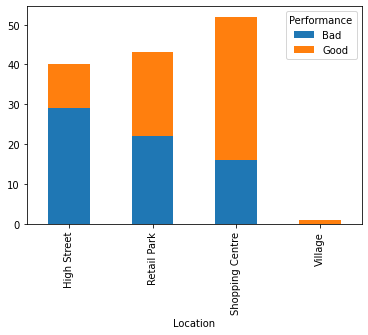

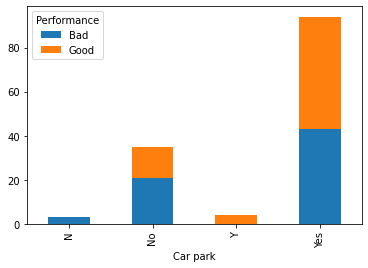

In [8]:
store_data.groupby(['Car park','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

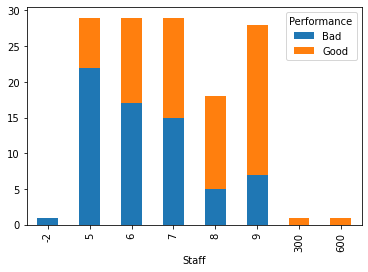

In [9]:
store_data.groupby(['Staff','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

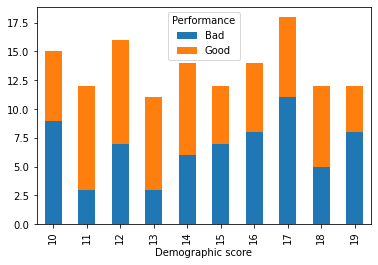

In [10]:
store_data.groupby(['Demographic score','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

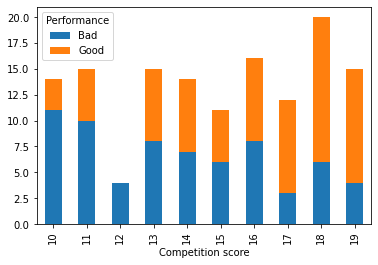

In [11]:
store_data.groupby(['Competition score','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

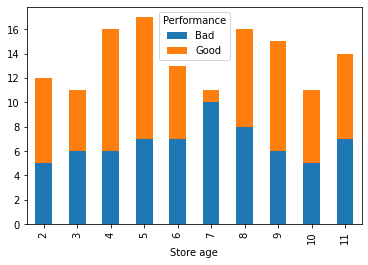

In [12]:
store_data.groupby(['Store age','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

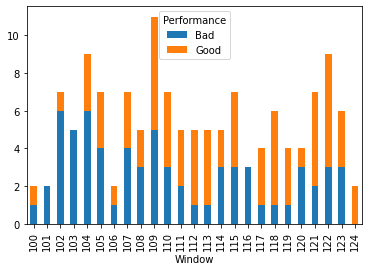

In [13]:
store_data.groupby(['Window','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

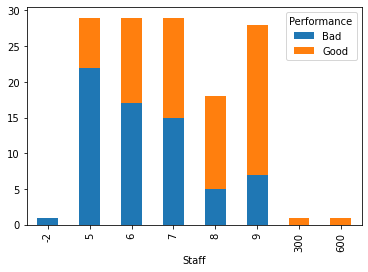

In [14]:
store_data.groupby(['Staff','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [15]:
# Find the correlation between our independent variables
corr_matrix = store_data.corr()
corr_matrix 

,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
Staff,1.000000,0.076039,0.077630,-0.057831,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579
Floor Space,0.076039,1.000000,0.999208,0.038187,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447
Window,0.077630,0.999208,1.000000,0.038633,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551
Demographic score,-0.057831,0.038187,0.038633,1.000000,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325
40min population,-0.098366,0.051918,0.053228,0.036694,1.000000,0.624732,0.516682,0.432857,-0.191329,-0.018234,-0.004326,0.040554
30 min population,-0.024631,-0.032199,-0.028688,-0.007616,0.624732,1.000000,0.766158,0.667031,-0.098829,-0.093048,-0.054191,0.046811
20 min population,-0.056310,-0.046161,-0.042441,0.053498,0.516682,0.766158,1.000000,0.807882,-0.046910,-0.085887,-0.081947,0.008492
10 min population,-0.006601,-0.096698,-0.091651,0.099587,0.432857,0.667031,0.807882,1.000000,-0.103815,-0.053129,-0.039108,0.068781
Store age,-0.172655,-0.049285,-0.048992,-0.014967,-0.191329,-0.098829,-0.046910,-0.103815,1.000000,-0.037935,-0.063024,-0.109725
Clearance space,0.110591,0.627324,0.628509,0.041849,-0.018234,-0.093048,-0.085887,-0.053129,-0.037935,1.000000,0.047191,0.156431


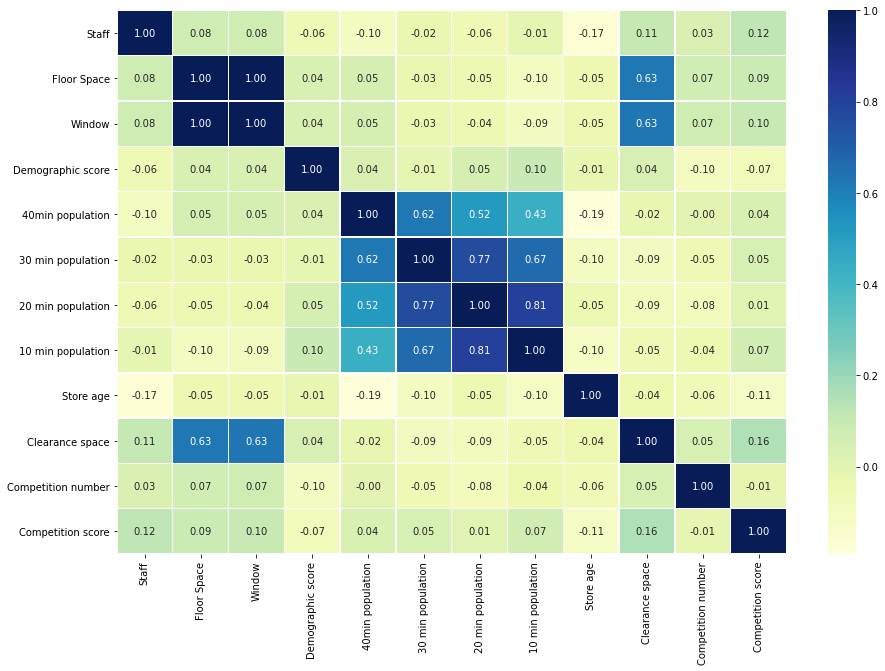

In [16]:
# Let's make it look a little prettier
corr_matrix = store_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [17]:
store_data['Car park'] = store_data['Car park'].map({'Yes':'Y' ,'No':'N'})
store_data.dtypes

Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

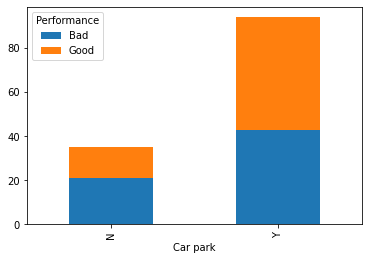

In [18]:
store_data.groupby(['Car park','Performance']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [19]:
num = store_data._get_numeric_data()
num[num < 0] = 0
store_data.head()

,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,121,Y,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,8,18569,121,Y,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,0,12288,105,N,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,7,17092,117,N,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,7,11307,103,N,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [20]:
d2={'Retail Park': 1,'Shopping Centre': 2,'High Street': 3,'Village': 4}
store_data['Location']=store_data['Location'].map(d2)

d3={'Good': 1,'Bad': 2}
store_data['Performance']=store_data['Performance'].map(d3)

store_data['Car park'] = np.where(store_data['Car park'] == 'N', 1, 2)

store_data=store_data.drop(['Car park'], axis = 1)

In [21]:
store_data.head()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1
1,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1
2,0,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18,2
3,7,17092,117,14,3,1179395,1022959,1009496,1002169,5,261,15,12,2
4,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13,2


In [22]:
store_data.dtypes

Staff                 int64
Floor Space           int64
Window                int64
Demographic score     int64
Location              int64
40min population      int64
30 min population     int64
20 min population     int64
10 min population     int64
Store age             int64
Clearance space       int64
Competition number    int64
Competition score     int64
Performance           int64
dtype: object

In [23]:
# Everything except target variable
X = store_data.drop("Performance", axis=1)

# Performance variable
y = store_data.Performance.values

In [24]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set

In [25]:
X_train.head()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
15,6,11824,104,14,3,1043277,1004546,1001718,1000627,6,225,11,19
83,5,16652,116,12,3,1931932,1547591,1547000,1298080,6,280,17,14
39,5,13127,107,16,3,1171849,1084983,1006564,1003013,7,235,19,10
22,7,18535,121,13,3,1182360,1077124,1049837,1014968,9,266,11,18
85,6,14497,111,17,3,1537976,1447127,1244066,1046174,5,311,17,18


In [26]:
y_train, len(y_train)

(array([2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1,
        1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2,
        1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
        1, 1, 2, 2, 2, 2, 1], dtype=int64),
 95)

In [27]:
X_test.head()

,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
73,5,13989,109,19,1,1087241,1026797,1010491,1001526,8,247,12,18
45,9,14948,112,15,3,1892976,1100161,1053955,1005729,4,263,19,17
60,5,12604,106,12,2,1359135,1218693,1145770,1067001,10,242,12,15
42,7,11441,103,13,2,1772431,1331168,1140500,1051557,11,207,10,13
128,9,13908,109,18,2,1586575,1021914,1017342,1013646,8,268,13,17


In [28]:
y_test, len(y_test)

(array([1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
        1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2],
       dtype=int64),
 41)

In [29]:
X_train.dtypes

Staff                 int64
Floor Space           int64
Window                int64
Demographic score     int64
Location              int64
40min population      int64
30 min population     int64
20 min population     int64
10 min population     int64
Store age             int64
Clearance space       int64
Competition number    int64
Competition score     int64
dtype: object

In [30]:
# Create dictionaries with model
models = {"MLP": MLPClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Decision Tree": DecisionTreeClassifier()}

# Common function to fit and score for given models
def fitAndScore(models, X_train, X_test, y_train, y_test):
    # Random seed
    np.random.seed(42)
    scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model 
        model.fit(X_train, y_train)
        # score it and storing it model_scores
        scores[name] = model.score(X_test, y_test)
    return scores

In [31]:
model_scores = fitAndScore(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'MLP': 0.5853658536585366,
 'Logistic Regression': 0.5609756097560976,
 'Decision Tree': 0.4878048780487805}

[Text(0.5, 1.0, 'Accuracy percentage before hyperparameters tunning'),
 Text(0.5, 0, 'Model Name'),
 Text(0, 0.5, 'Accuracy Percentage')]

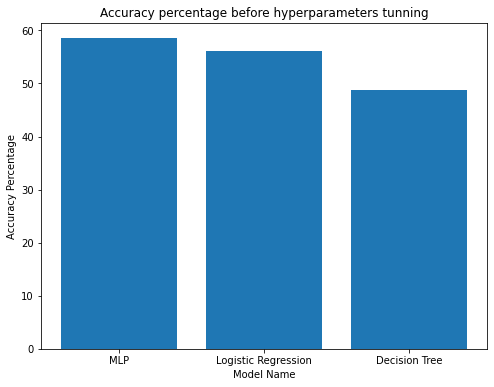

In [32]:
# model_compare = pd.DataFrame(model_scores, index=['accuracy'])
# model_compare.T.plot.bar();

inputdict = {}
for key, value in model_scores.items():
    # do something with value
    inputdict[key] = value * 100

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(inputdict.keys(), inputdict.values())

# Add a title, xlabel and ylabel to the plot
ax.set(title="Accuracy percentage before hyperparameters tunning",
       xlabel="Model Name",
       ylabel="Accuracy Percentage")

In [33]:
# Different DecisionTreeClassifier hyperparameters
import random
de_tree_params = {"max_depth": [3, None],
              "max_features":  ('auto', 'sqrt', 'log2'),
              "min_samples_leaf": (1,2,3,4,5,6,7,8,9),
              'min_samples_split' : (2,4,6,8,10,20),
              "criterion": ["gini", "entropy"]}

np.random.seed(42)
gs_de_tree = GridSearchCV(DecisionTreeClassifier(), de_tree_params, cv=5)

# Fit Grid Search hyperparameter search model
gs_de_tree.fit(X_train, y_train);

In [34]:
# Print the tuned parameters and score
print("Decision Tree using GridSearchCV: {}".format(gs_de_tree.best_params_))
print(gs_de_tree.best_score_)

Decision Tree using GridSearchCV: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7263157894736842


In [35]:
# Now use the best_params_ found above and try to fit the model and predict the score
np.random.seed(42)
final_decison_tree = DecisionTreeClassifier(criterion="entropy", 
                                            max_depth=3, 
                                            max_features="sqrt", 
                                            min_samples_leaf=8, 
                                            min_samples_split=2)

final_decison_tree.fit(X_train, y_train)

y_pred=final_decison_tree.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1],
      dtype=int64)

Accuracy: 0.4878048780487805


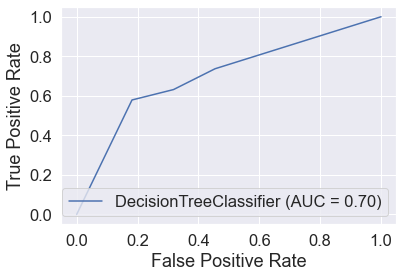

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_roc_curve(final_decison_tree, X_test, y_test);

In [37]:
y_preds = final_decison_tree.predict(X_test)

In [38]:
y_preds

array([1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1],
      dtype=int64)

In [39]:
y_test

array([1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2],
      dtype=int64)

In [71]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds)

0.6566985645933014

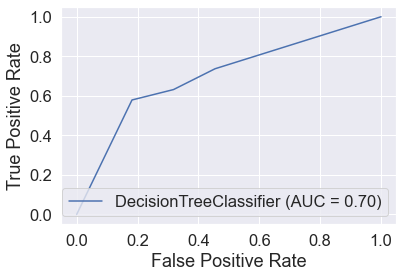

In [74]:
# Plot ROC curve
plot_roc_curve(final_decison_tree, X_test, y_test);

In [41]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[15  7]
 [ 7 12]]


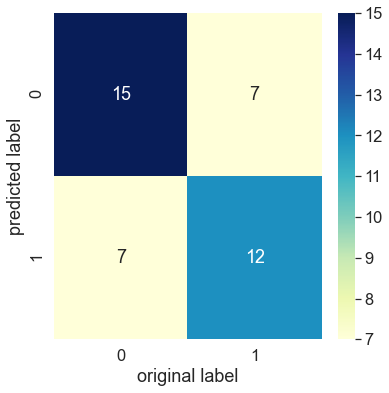

In [63]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=True, cmap="YlGnBu")
    plt.xlabel("original label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [43]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.68      0.68      0.68        22
           2       0.63      0.63      0.63        19

    accuracy                           0.66        41
   macro avg       0.66      0.66      0.66        41
weighted avg       0.66      0.66      0.66        41



In [44]:
# Now perform the same thing for logistic regression and below are the hyperparameters and get the score
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Now perform the same thing for MLP classifier and below are the hyperparameters and get the score
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

In [45]:
# After performing the hypertuning we need to choose one model on which give us best score

In [46]:
# ROC, confusion_matrix and classification report for choosen model

In [47]:
# At last, Perform the K fold validation on same model in classification report please check the below url for reference
#https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification.ipynb

In [48]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(), log_reg_grid, cv=5)

# Fit Grid Search hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [49]:
print("Best Params found for Logistic Regression: {}".format(gs_log_reg.best_params_))
print(gs_log_reg.best_score_)

Best Params found for Logistic Regression: {'C': 3792.690190732246, 'solver': 'liblinear'}
0.6736842105263158


In [50]:
# Now use the best_params_ found above and try to fit the model and predict the score
np.random.seed(42)
final_logistic_reg = LogisticRegression(C=3792.690190732246,
                                        solver='liblinear')

final_logistic_reg.fit(X_train, y_train)

y_pred = final_logistic_reg.predict(X_test)
y_pred

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2],
      dtype=int64)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5853658536585366


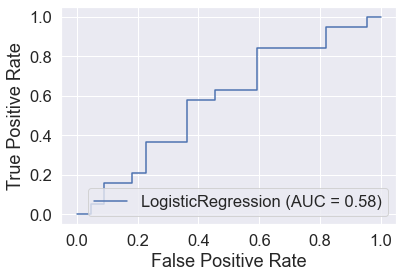

In [52]:
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(final_logistic_reg, X_test, y_test);

In [53]:
np.random.seed(42)
mlp = MLPClassifier(max_iter=1)

parameter_space = {
    'hidden_layer_sizes': [(368,), (555,), (100,)],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 1000, 5000, 10000]
}


gs_clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
gs_clf_mlp.fit(X_train, y_train);

In [54]:
print("Tuned MLP Classifier using GridSearchCV: {}".format(gs_clf_mlp.best_params_))

Tuned MLP Classifier using GridSearchCV: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (555,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}


In [55]:
np.random.seed(42)
final_mlp_clf = MLPClassifier(activation = 'logistic', 
                              alpha = 0.0001, 
                              hidden_layer_sizes = (555,), 
                              learning_rate = 'constant', 
                              solver='sgd', 
                              max_iter=10000)

final_mlp_clf.fit(X_train, y_train)

y_pred = final_mlp_clf.predict(X_test)
y_pred

array([1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1],
      dtype=int64)

Accuracy: 0.4878048780487805


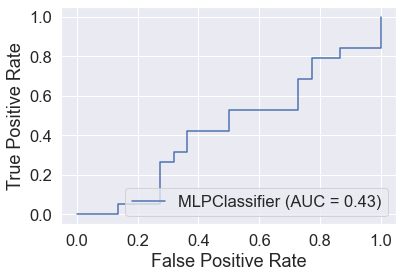

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(final_mlp_clf, X_test, y_test);

[Text(0.5, 1.0, 'Accuracy Percentage after hyperparameters tunning'),
 Text(0.5, 0, 'Model Name'),
 Text(0, 0.5, 'Accuracy Percentage')]

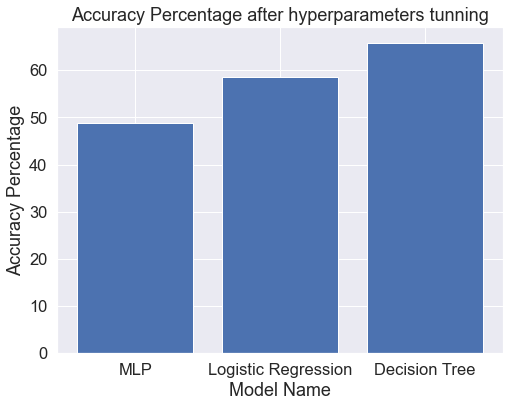

In [57]:
inputs = {'MLP': 0.4878048780487805,
 'Logistic Regression': 0.5853658536585366,
 'Decision Tree': 0.6585365853658537}

inputdict = {}
for key, value in inputs.items():
    # do something with value
    inputdict[key] = value * 100

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(inputdict.keys(), inputdict.values())

# Add a title, xlabel and ylabel to the plot
ax.set(title="Accuracy Percentage after hyperparameters tunning",
       xlabel="Model Name",
       ylabel="Accuracy Percentage")